In [1]:
%cd ..
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/juansegundohevia/Documents/repos/rice-datathon-2024-chevron


In [6]:
import utils

In [8]:
preprocessed = pd.read_csv('data/training.csv')

preprocessed = utils.get_custom_estimations(preprocessed)

preprocessed.columns

Index(['Unnamed: 0', 'surface_x', 'surface_y', 'bh_x', 'bh_y',
       'standardized_operator_name', 'gross_perforated_length',
       'number_of_stages', 'total_proppant', 'total_fluid',
       'true_vertical_depth', 'ffs_frac_type', 'proppant_intensity',
       'frac_fluid_intensity', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship', 'frac_type',
       'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate',
       'predicted_number_of_total_stages',
       'predicted_number_of_lateral_stages', 'number_of_lateral_stages'],
      dtype='object')

In [9]:
# data = pd.read_csv("data/PREPRO-SAMPLE-1.csv")
# data.head()
data = preprocessed.copy()

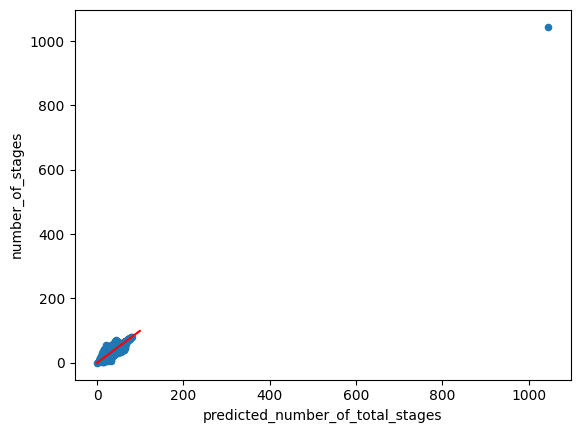

In [10]:
data.plot(
    kind="scatter",
    x="predicted_number_of_total_stages",
    y="number_of_stages",
)

plt.plot(np.arange(0, 100), np.arange(0, 100), color="red")

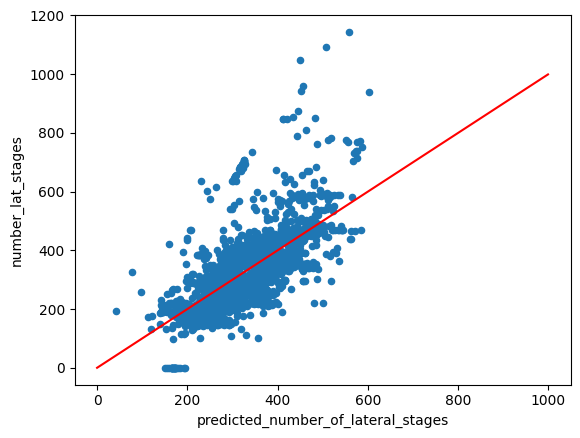

In [10]:
data["number_lat_stages"] = data["bin_lateral_length"] * data["average_stage_length"]

data.plot(
    kind="scatter",
    x="predicted_number_of_lateral_stages",
    y="number_lat_stages",
)

plt.plot(np.arange(0, 1000), np.arange(0, 1000), color="red")

Text(0, 0.5, 'Actual number of stages')

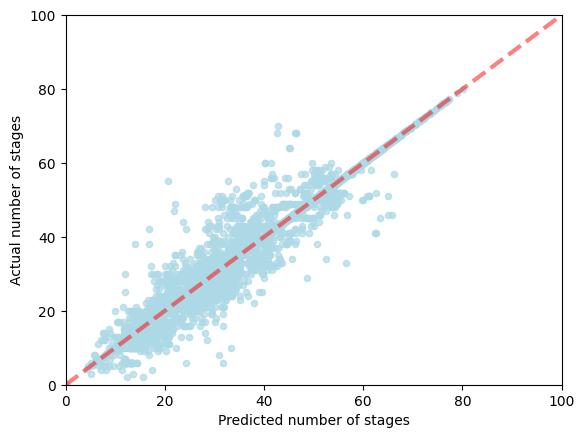

In [18]:

data.plot(
    kind="scatter",
    x="predicted_number_of_total_stages",
    y="number_of_stages",
    alpha=0.7,
    color="lightblue"
)

plt.plot(np.arange(0, 100), np.arange(0, 100), color="red", alpha=.5, ls="--", lw=3)
plt.ylim(0, 100)
plt.xlim(0, 100)

plt.xlabel("Predicted number of stages")
plt.ylabel("Actual number of stages")


In [13]:
data["number_of_stages"].fillna(data["predicted_number_of_total_stages"])

0        12.000000
1        11.000000
2        10.269002
3        11.467878
4        11.025602
           ...    
14041     7.022801
14042    19.000000
14043    11.449393
14044    23.242442
14045    24.531489
Name: number_of_stages, Length: 14046, dtype: float64

In [14]:
data[["number_of_stages", "predicted_number_of_total_stages"]]

,number_of_stages,predicted_number_of_total_stages
0,12.0,15.371513
1,11.0,13.236485
2,NaN,10.269002
3,NaN,11.467878
4,NaN,11.025602
...,...,...
14041,NaN,7.022801
14042,19.0,13.276192
14043,NaN,11.449393
14044,NaN,23.242442
